# Model Evaluation

Now, we need to evaluate the performance of our model. We do this by using the AUC on the vaildation set as our performance measure. After tuning and trying out various possibilities of hyperparameter combinations as described above, our best model achieves an AUC of 0.75 on the test dataset:

AUC:  0.7456174711349624


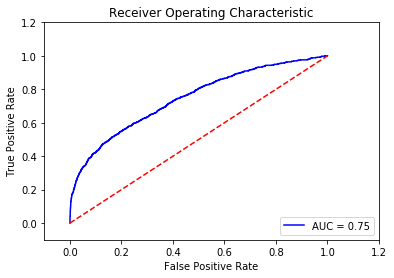

In [0]:
print('AUC: ', metrics.roc_auc_score(y_test, predictions))
actual = y_test
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Lastly, let´s check for potential overfitting. For this purpose, we plot the accuracy on both training and test set over the trained epochs:

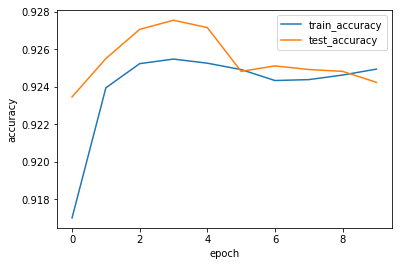

In [0]:
def show_history(story):
    plt.plot(story.history['acc'])
    plt.plot(story.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(story)

As the accuracy of the test dataset already seems to be decreasing after the first epoch, it seems to be reasonable to not train the network too much for the given data and to include a stopping criterion:

In [0]:
cb=[EarlyStopping(monitor='val_acc', mode='auto', verbose=0, patience=3, restore_best_weights=True)]
cbmodel = Sequential()
cbmodel.add(Dense(80, kernel_regularizer=l2(0.01), kernel_initializer=glorot_normal(seed=42), bias_initializer='zeros', activation='relu', input_dim = 125))
cbmodel.add(Dense(40, kernel_regularizer=l2(0.01), kernel_initializer=glorot_normal(seed=42), bias_initializer='zeros', activation='relu'))
cbmodel.add(Dense(10, kernel_regularizer=l2(0.01), kernel_initializer=glorot_normal(seed=42), bias_initializer='zeros', activation='relu'))
cbmodel.add(Dense(1, activation='sigmoid'))
cbmodel.compile(optimizer=Adam(lr = 0.00005), loss='binary_crossentropy', metrics=['accuracy'])
story3 = cbmodel.fit(x = X_train, y = y_train, validation_data=[X_test, y_test], epochs = 10, batch_size=24, callbacks=cb, verbose=0)
predictions_cb = cbmodel.predict(X_test)
print('AUC: ', metrics.roc_auc_score(y_test, predictions_cb))

AUC:  0.7329461398954409


Yet, when including such a stopping criterion, we do not improve our results and therefore, again, stick to our initial model. ***Therefore, the result of our best model (AUC on test set) stays:***

In [0]:
print('AUC: ', metrics.roc_auc_score(y_test, predictions))

AUC:  0.7456174711349624
